![Weather Banner](img/Assignment2.png)

# Assignment 2: Weather

Task: Create a Jupyter notebook with a plot of the dryBulbTemperature_Celsius over time.

Author: Irene Kilgannon

In [1]:
# Import the required modules.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import DateFormatter

The data for this analysis was downloaded from the [assignments folder](https://github.com/andrewbeattycourseware/PFDA-courseware/tree/main/assignment) in the PFDA-courseware repository on GitHub. 

The csv file contains weather data for the Athenry weather station from 4.15 pm on the 2nd of October to 3pm on the 3rd October 2024. 

Only the reportStartTime and the dryBulbTemperature_Celsius time columns from the csv file will be read into pandas as these are the required columns for the analysis. There are a number of datetime columns in the csv file all with the same time and date. 

In [2]:
# Load the csv file, parsing the date column as the datetime datatype.
# Set the date column as the index.
# Only the columns required for the task will be loaded.
df = pd.read_csv("data\weatherreadings1.csv", 
                usecols = ['reportStartDateTime','dryBulbTemperature_Celsius'],
                parse_dates = ['reportStartDateTime'],
                index_col=['reportStartDateTime'])

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_17423/2540789029.py:4: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("data\weatherreadings1.csv",
/tmp/ipykernel_17423/2540789029.py:4: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("data\weatherreadings1.csv",


FileNotFoundError: [Errno 2] No such file or directory: 'data\\weatherreadings1.csv'

Parsing the date column to the datetime and setting it as the index is good practice as it allows access to datetime functionality. As this is a small data set we do not need to access the [Datetime properties](https://khuyentran1401.github.io/Efficient_Python_tricks_and_tools_for_data_scientists/Chapter3/date_time.html#pandas-series-dt-access-datetime-properties-of-a-pandas-series), for example to group the data by the month or finding specific the rows in a dataset for a selected year nevertheless the datetime column will be set as the index.

In [ ]:
# Explore the dataset. Check that the data loaded correctly.
df.head()

,dryBulbTemperature_Celsius
reportStartDateTime,
2024-10-02 16:15:00+00:00,15.944444
2024-10-02 16:45:00+00:00,15.777778
2024-10-02 17:00:00+00:00,15.111111
2024-10-02 17:15:00+00:00,14.277778
2024-10-02 17:30:00+00:00,13.666667


In [ ]:
# General information about the data set. 
# Check the data type of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2024-10-02 16:15:00+00:00 to 2024-10-03 15:00:00+00:00
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dryBulbTemperature_Celsius  89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


The data type of the dryBulbTemperature_Celsius column is float which is the correct data type.

In [ ]:
# Get the temperature range in the data
df['dryBulbTemperature_Celsius'].agg(['min', 'max'])

min     9.166667
max    15.944444
Name: dryBulbTemperature_Celsius, dtype: float64

In [ ]:
# Set the style of the plot
plt.style.use('seaborn-v0_8')

__Date Formatters__

Matplotlib as a built in converter, [matplotlib.dates](https://matplotlib.org/stable/api/dates_api.html) that will handle any columns with a datetime data type. 

[Useful Python, Compactly display the date](https://www.useful-python.com/en/matplotlib-datetime/#index_id7) describes the ``ConciseDateFormatter`` as a method to display the date in the best format and as compactly as possible. An alternative to ConciseDateFormatter is ``AutoDateFormatter``. The matplotlib documentation demonstrates how to [customise the `ConciseDateFormatter`](https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html#localization-of-date-formats) if the user would like a different date format.

``AutoDateLocator`` picks the best ``DateLocator`` to set the position, number and increments of the time axis ticks. There are a range of `DateLocators` available such as `HourLocator` if a different locator is required. For this data the ``AutoDateLocator`` gave the desired result. 

Date formatters and date locators are most useful when used together. For this task the `AutoDateLocator` has a tick mark every three hours and the `ConciseDateFormatter` has chosen the format for the date at 00:00 and for the date displayed at bottom right of the plot in ISO format.

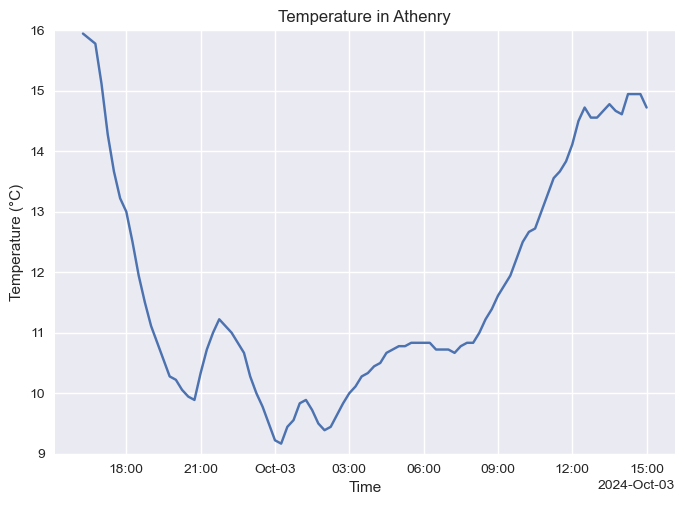

In [ ]:
# Plotting using ConciseDateFormatter

# Set up figure, axis plots
fig, ax = plt.subplots()

# AutoDateLocator
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)

# ConciseDateFormatter 
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)

# Plot the data
ax.plot(df.index, df['dryBulbTemperature_Celsius'])

# Set the limits of the plot
ax.set_ylim((9, 16))

# Set axis labels and title
ax.set(xlabel='Time',
       ylabel = 'Temperature (°C)',
       title = 'Temperature in Athenry')

# Display the plot
plt.show()

Another method to format the major and minor ticks using ``set_major_formatter()`` and ``set_minor_formatter()`` is shown below. I have included it as part of this assignment as it demonstrates the use of formatting to adjust the parameters for displaying the date and time for the ticks on the x-axis. This reference, [Customize Dates on Times Series Plots in Python Using Matplotlib](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/) was very helpful in understanding how the major_formatter works. It shows how to customise the look of your labels using ``DateFormatter``.

One problem I had was displaying the minor ticks on the x-axis. The minor ticks on the x-axis need to be turned on so that they can be displayed. These two references [Matplotlib won't show minor ticks when using subplots](https://stackoverflow.com/questions/56657712/matplotlib-wont-show-minor-ticks-when-using-subplots) and [How to turn on minor ticks on y axis](https://stackoverflow.com/questions/12711202/how-to-turn-on-minor-ticks-only-on-y-axis) showed me how it is done. 

Special format codes are used to format the date and time. This reference shows all the [format-codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) possible. This plot uses %H:%M to display the hour:minute. It also uses %d %b to display the date and month. %b displays the abbreviated month name.

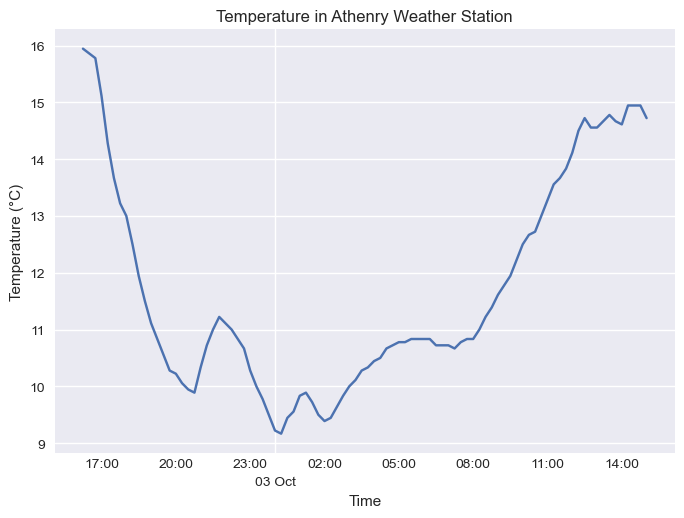

In [ ]:
# Plot the Temperature
fig, ax = plt.subplots()

plt.plot(df.index, df['dryBulbTemperature_Celsius'])

ax.set(xlabel='Time',
       ylabel = 'Temperature (°C)',
       title = 'Temperature in Athenry Weather Station')

# Turn on minor ticks on x-axis
ax.tick_params(axis='x', which='minor', bottom=True)

# Minor ticks every 3 hours with the format of Hour:Minute
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3)) 
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%S'))

# Major ticks on a new date
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 1))

plt.show()

### References



__General Matplotlib References__

[Chapter 4. Visualisation with Matplotlib](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html)

__Using set_major_formatter__

[Matplotlib won't follow date format set by set_major_formatter or set_minor_formatter for some datasets](https://stackoverflow.com/questions/72969795/matplotlib-wont-follow-date-format-set-by-set-major-formatter-or-set-minor-form)

[Tick locating and formatting](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter)

__ConciseDateFormatter References__

[Formatting Date ticks using ConciseDateFormatter](#https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html)


End

***